# ***SALES PREDICTION DATASET***

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('advertising_sales_data.csv')

QUESTION 1.	What is the average amount spent on TV advertising in the dataset?

In [74]:
amount = df['TV'].mean()
print(f"According to the dataset the average amount spent on TV advertising is {amount}")

According to the dataset the average amount spent on TV advertising is 147.0425


QUESTION 2.	What is the correlation between radio advertising expenditure and product sales?

In [75]:
cr = df['Radio'].corr(df['Sales'])
print(f"The correlation between radio advertising expenditure and product sales in {cr}")

The correlation between radio advertising expenditure and product sales in 0.3497277129207837


QUESTION 3.	Which advertising medium has the highest impact on sales based on the dataset?

In [76]:
f = df.iloc[:,list(range(1,5))]

correlations = f.corr()['Sales'].drop('Sales')
highest_impact_feature = correlations.abs().idxmax()
print(f"The advertising medium with the highest impact on Sales is: {highest_impact_feature}")

The advertising medium with the highest impact on Sales is: TV


QUESTION 4.	Plot a linear regression line that includes all variables (TV, Radio, Newspaper) to predict Sales, and visualize the model's predictions against the actual sales values.

In [77]:
X = df.iloc[:,1:-1].values
Y = df.iloc[:,-1]

In [78]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

imputer = IterativeImputer(max_iter=10,random_state=0)
linear_regressor = LinearRegression()
imputer = IterativeImputer(random_state=0, estimator=linear_regressor)
imputer.fit(X)

X = imputer.transform(X)
nums = ['TV','Radio','Newspaper']
X = pd.DataFrame(X, columns = nums)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
dtypes: float64(3)
memory usage: 4.8 KB


In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 1)

In [80]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [81]:
print(lr.coef_)
print(lr.intercept_)

[ 0.05509821  0.10332381 -0.00111824]
4.640410838928322


In [82]:
y_pred = lr.predict(X_test)

from sklearn.metrics import mean_squared_error

MSE_before = mean_squared_error(Y_test, y_pred)

VISUALIZING LINEAR REGRESSION LINE WITH PAIR WISE FEATURES

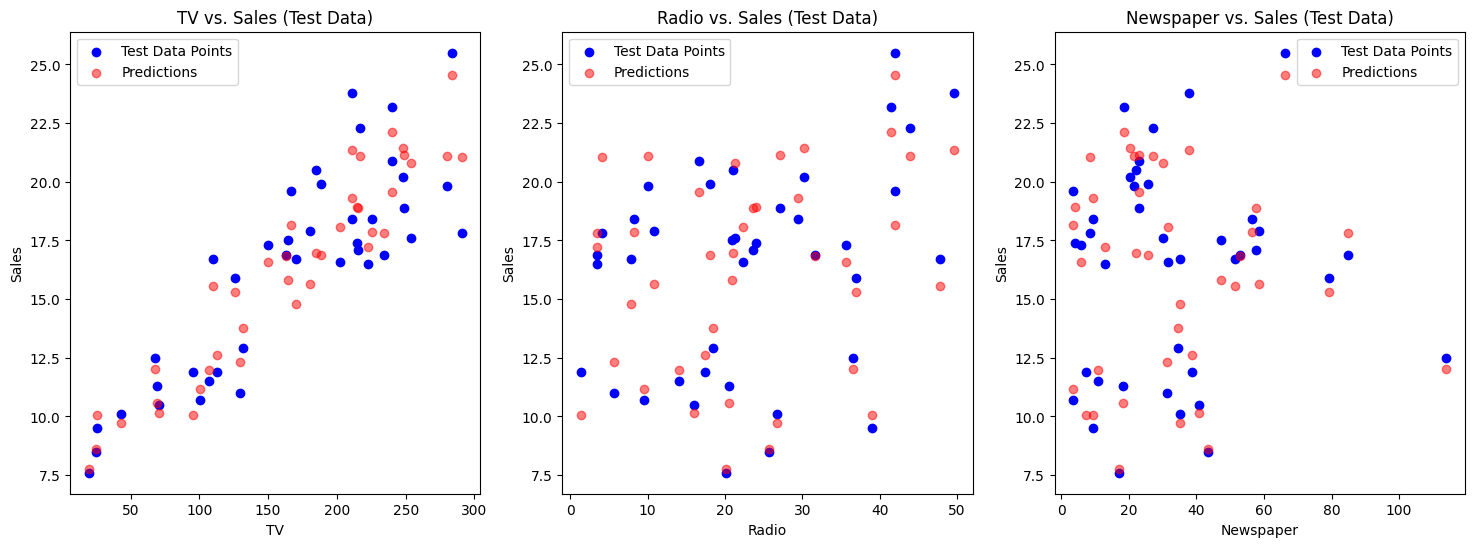

In [83]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot TV vs. Sales (Test data)
axes[0].scatter(X_test['TV'], Y_test, color='blue', label='Test Data Points')
axes[0].scatter(X_test['TV'], y_pred, color='red', label='Predictions', alpha=0.5)
axes[0].set_xlabel('TV')
axes[0].set_ylabel('Sales')
axes[0].set_title('TV vs. Sales (Test Data)')
axes[0].legend()

# Plot Radio vs. Sales (Test data)
axes[1].scatter(X_test['Radio'], Y_test, color='blue', label='Test Data Points')
axes[1].scatter(X_test['Radio'], y_pred, color='red', label='Predictions', alpha=0.5)
axes[1].set_xlabel('Radio')
axes[1].set_ylabel('Sales')
axes[1].set_title('Radio vs. Sales (Test Data)')
axes[1].legend()

# Plot Newspaper vs. Sales (Test data)
axes[2].scatter(X_test['Newspaper'], Y_test, color='blue', label='Test Data Points')
axes[2].scatter(X_test['Newspaper'], y_pred, color='red', label='Predictions', alpha=0.5)
axes[2].set_xlabel('Newspaper')
axes[2].set_ylabel('Sales')
axes[2].set_title('Newspaper vs. Sales (Test Data)')
axes[2].legend()

plt.show()

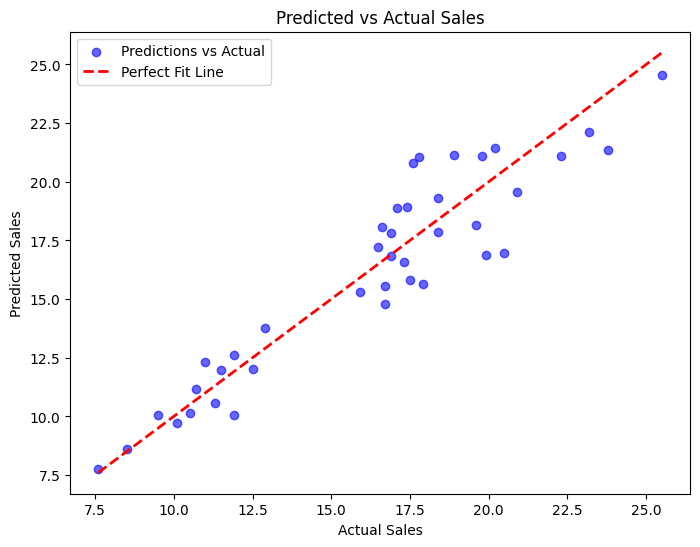

In [84]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, y_pred, color='blue', label='Predictions vs Actual', alpha=0.6)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--', linewidth=2, label='Perfect Fit Line')

plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Predicted vs Actual Sales')
plt.legend()

QUESTION 5.	How would sales be predicted for a new set of advertising expenditures: $200 on TV, $40 on Radio, and $50 on Newspaper?

ANSWER 5:

In [85]:
new_sales = lr.intercept_ + lr.coef_[0]*200 + lr.coef_[1]*40 + lr.coef_[2]*50
print(f"The predicted sales according to given specific details is: {new_sales}")

The predicted sales according to given specific details is: 19.737093467922055


QUESTION 6.	How does the performance of the linear regression model change when the dataset is normalized?

ANSWER 6:

In [86]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, Y_train, Y_test = train_test_split(normalized_X, Y, test_size = 0.25, random_state = 0)

ln = LinearRegression()
ln.fit(X_train,Y_train)

y_pred = ln.predict(X_test)
MSE_after = mean_squared_error(Y_test, y_pred)

print("Thus, the model by normalizing minimises the mean squared error and improves its overall performance")

Thus, the model by normalizing minimises the mean squared error and improves its overall performance


QUESTION 7.	What is the impact on the sales prediction when only radio and newspaper advertising expenditures are used as predictors?

ANSWER 7:

In [68]:
X.drop(columns=['TV'], inplace=True)

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

model = LinearRegression()

model.fit(X_train,Y_train)

LinearRegression()

In [72]:
print("Coefficients and interecept with all three input features:")
print(lr.coef_)
print(lr.intercept_)
print("\nCoefficients and intercepts with only Radio and Newspaper as inut features:")
print(model.coef_)
print(model.intercept_)

Coefficients and interecept with all three input features:
[ 0.05509821  0.10332381 -0.00111824]
4.640410838928322

Coefficients and intercepts with only Radio and Newspaper as inut features:
[0.11449562 0.01923908]
12.10065413666286
